# Monte Carlo Simulation

The Monte Carlo simulation is a mathematical technique that simulate all possible outcomes of an uncertain event. Computer programs use this method to analyze past data and predict a range of future outcomes based on a choice of action. For example, if you want to estimate the first month’s sales of a new product, you can give the Monte Carlo simulation program your historical sales data. The program will estimate different sales values based on factors such as general market conditions, product price, and advertising budget.

### What are the components of a Monte Carlo simulation?

A Monte Carlo analysis consists of input variables, output variables, and a mathematical model. The computer system feeds independent variables into a mathematical model, simulates them, and produces dependent variables. 

<span style='color:blue'>Input variables:</span> Input variables are random values that affect the outcome of the Monte Carlo simulation. For example, manufacturing quality and temperature are input variables that influence a smartphone's durability. You can express input variables as a range of random value samples so Monte Carlo methods can simulate the results with random input values. 

<span style='color:blue'>Output variables:</span> The output variable is the result of the Monte Carlo analysis. For example, an electronic device’s life expectancy is an output variable, with its value being a time such as 6 months or 2 years. The Monte Carlo simulation software shows the output variable in a histogram or graph that distributes the result in a continuous range on the horizontal axis.

<span style='color:blue'>Mathematical model:</span> A mathematical model is an equation that describes the relationship between output and input variables in mathematical form. For example, the mathematical model for profitability is Profit = Revenue − Expenses.

The Monte Carlo software replaces revenue and expenses with probable values based on the probability distribution type. Then it repeats the simulation to get a highly accurate result. The Monte Carlo simulation can be time consuming with replications depending on the complexity of the mathematical model and number of the random variables. 

### What are probability distributions in the Monte Carlo simulation(Background Knowledge)?

Probability distributions are statistical functions that represent a range of values distributed between limits. Statistics experts use probability distributions to predict the possible occurrence of an uncertain variable, which might consist of discrete or continuous values. The following are common types of probability distributions that a Monte Carlo simulation can model.

1. **Normal distribution**, also known as the bell curve, is symmetrically shaped like a bell and represents most real-life events. The possibility of a random value at the median is high, and the probability significantly decreases toward both ends of the bell curve. For example, a repeated random sampling of the weight of students in a particular classroom gives you a normal distribution chart.

<div style="text-align: center;">
    <img src="NormalDistribution.png" alt="Alt Text" width="40%">
</div>

2. **Uniform distribution** refers to a statistical representation of random variables with equal chance. When plotted on a chart, the uniformly distributed variables appear as a horizontal flat line across the valid range. For example, the uniform distribution represents the likelihood of rolling and landing on each side of a die.

<div style="text-align: center;">
    <img src="UniformDistribution.png" alt="Alt Text" width="40%">
</div>

3. **Triangular distribution** uses minimum, maximum, and most-likely values to represent random variables. Its probability peaks at the most-likely value. For example, companies use triangular distribution to predict upcoming sales volumes by establishing the triangle's minimum, maximum, and peak value.

<div style="text-align: center;">
    <img src="TriangularDistribution.png" alt="Alt Text" width="40%">
</div>

5. Other distribution including Exponential Distribution, Possion distribution, 

### What are the challenges of the Monte Carlo simulation?
These are three common challenges when using Monte Carlo simulations: 

1. The Monte Carlo simulation is highly dependent on the input values and distribution. If mistakes are made when electing the input and probability distribution, it can lead to inaccurate results. 

2. The Monte Carlo simulation assumes that all random variables are independent and identically distributed (i.i.d.). However, in reality, this assumption is usually implausible. If there exist dependency in the random variables, the simulation results can be inaccurate due the the bias that were introduced by the dependency.

3. The Monte Carlo simulation usually requires extensive computational power for the simulation process. The running time can be extremely time consuming depending on the mathematical complexity and number of random variables.

### A Classic Example of Monte Carlo Simulation--Estimating the value of Pi

The idea of estimating the value of pi using MC is to sampling random (x, y) points in a 2-D plane within a square domain. Then, imagine a circle that is inside the square and is tangent to all four sides of the square. We then calculate the ratio of number points that lied inside the circle and total number of generated points. The ratio should equal to the area ratio between the square and the inscribed circle. Refer to the image below:

<div style="text-align: center;">
    <img src="MonteCarlo.png" alt="Alt Text">
</div>

In [2]:
import numpy as np

def estimate_pi(num_iter):

    count = 0 # count how many points fall into the circle. 
    for i in range(num_iter):
        rand_x = np.random.uniform(0, 1) # point on the x coordinate
        rand_y = np.random.uniform(0, 1) # point on the y coordinate
        if (rand_x - 0.5)**2 + (rand_y - 0.5)**2 < 0.25: # calculate the distance and compare to R square
            count = count + 1
    return 4 * count / num_iter # calculating pi

pi = estimate_pi(99999)
pi

3.1392313923139232

# Monte Carlo Simulation Example with NumPy
Based on a problem defined by Anthony Sun (http://www.geocities.com/WallStreet/9245/vba12.htm used originally with permission.  The link is no longer live, but I include it for completeness.

A firm is considering producing and selling a new product under a pure/perfect competition market and the firm wants to know the probability distribution for the profit associated with this product.  The total profit is given by the equation:

$TP=(Q \times P)-(Q \times V+F)$

where $TP$ is the total profit, $Q$ is the quantity sold, $P$ is the selling price, $V$ is the variable cost, and $F$ is the fixed cost.  Since the firm is *predicting* what will happen if they produce the product, some of the profit components are uncertain.  In particular, $Q$, $P$, and $V$ are estimated to be *random variables* with the following distributions:

  * $Q$: uniform(8000, 12000)
  * $P$: normal(10, 3)
  * $V$: normal(7, 2)

$F$ is fixed at 5000.

The goal is to use Monte Carlo simulation to estimate various descriptive statistics about the total profit associated with the product (if the project were undertaken) and to ultimately proivde information to aid a decision-maker in deciding whether or not to pursue the project.

## Some Initial Setup

In [3]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Define a function to plot a histogram of the observations
#
def hplot(tps, NumBins = 20) :
    # create histogram
    plt.hist(tps, bins=NumBins)
    # yellow line at the sample mean
    plt.axvline(AvgTP, color='y', linestyle='solid', linewidth=4)
    # red line at 0
    plt.axvline(0, color='r', linestyle='solid', linewidth=2)
    plt.show()

## Standard Loop-based Version

In [4]:
#
# Define a function to sample an observation (one replication)
#
def sample() :
    q = random.uniform(8000, 12000)
    v = random.normalvariate(7, 2)
    p = random.normalvariate(10, 3)
    return (q * (p - v) - 5000)

Replications = 500000
tps = [] # list to hold simulation scenarios

# Loop
for i in range (Replications) :
    # sample the value
    tp = sample()
    # Accumulate for the average
    tps.append(tp);
# compute average
AvgTP = float(sum(tps))/Replications


Based on 500,000 replications:
	Average : 24,998.92
	Range   : (-163,074.81, 211,899.80)
	pr(<0)  : 0.2442


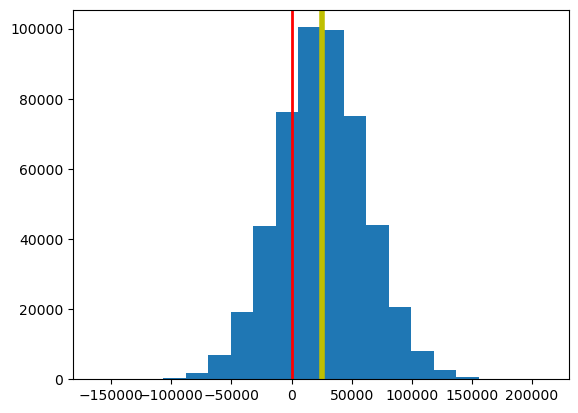

In [5]:
# show solution
print ("\nBased on {:,d} replications:".format(Replications))
print ("\tAverage : {:,.2f}".format(AvgTP))
print ("\tRange   : ({:,.2f}, {:,.2f})".format(min(tps), max(tps)))
print ("\tpr(<0)  : {:.4f}".format(float(len([v for v in tps if v < 0]))/Replications))
hplot(tps)

## Simple Vector Version Using NumPy

In [6]:
# Simple vector version using NumPy
# Specify the number of observations/replications to perform
obs = 500000
# generate the input vectors
price = np.random.normal(10, 3, obs)
marginal = np.random.normal(7, 2, obs)
demand = np.random.uniform(8000, 12000, obs)
# compute the expected profit for each replication (using vector operations)
tp = demand * (price - marginal) - 5000
# compute average
AvgTP = float(sum(tp)) / obs

          Expected profit: $ 24,950.98
                Std. Dev.: $ 36,435.01
          25th Percentile: $    503.55
          75th Percentile: $ 48,952.84
     Prob. of losing money: 0.246
Prob. of making > $100,000: 0.022


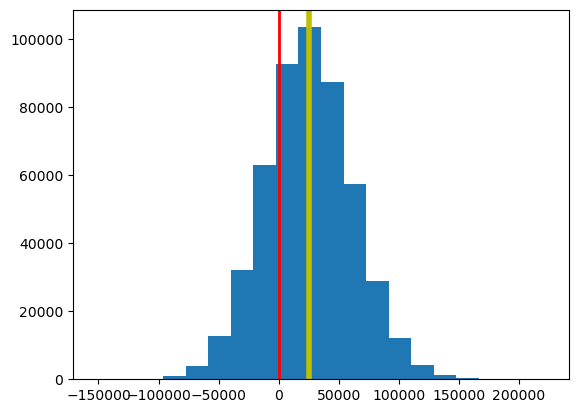

In [7]:
# basic display of results
# Descriptive Statistics
print("          Expected profit: ${:10,.2f}".format(tp.mean()))
print("                Std. Dev.: ${:10,.2f}".format(tp.std()))
print("          25th Percentile: ${:10,.2f}".format(np.percentile(tp, 25)))
print("          75th Percentile: ${:10,.2f}".format(np.percentile(tp, 75)))
print("     Prob. of losing money: {:.3f}".format(np.sum(tp < 0)/obs))
print("Prob. of making > $100,000: {:.3f}".format(np.sum(tp > 100000)/obs))
# histogram
hplot(tp)

## Aggregate the Individual Arrays into a Single Experiment

This will give you a single matrix with rows representing replications and columns presenting the random variable observations.

In [8]:
# Create 4 single-column arrays from the individual arrays
p = price.reshape(obs,1)
m = marginal.reshape(obs,1)
d = demand.reshape(obs,1)
pr = tp.reshape(obs,1)
p.shape, m.shape, d.shape, pr.shape

((500000, 1), (500000, 1), (500000, 1), (500000, 1))

In [ ]:
# Create 4 single-column arrays - A different way to do the reshape operation
#p = price[:,np.newaxis]
#m = marginal[:, np.newaxis]
#d = demand[:, np.newaxis]
#pr = tp[:, np.newaxis]
#p.shape, m.shape, d.shape, pr.shape

In [9]:
# Concatenate the four into a matrix -- each row represents a replication
a = np.concatenate([p, m, d, pr], axis=1)
a.shape

(500000, 4)

In [10]:
# mean of each random variable
a.mean(axis=0)

array([9.99605115e+00, 7.00073527e+00, 9.99969322e+03, 2.49509834e+04])